Question 13

Load housing dataset and visualize it. Implement linear regression by considering area as a independent variable and price as dependent variable. Calculate mean squared error(MSE). Implement gradient descent to minimize the Mean Squared Error (MSE) cost function. Plot the cost function over iterations to observe convergence. Experiment with different learning rates and analyze their effects on convergence speed. Normalize the dataset (e.g., feature scaling) and repeat gradient descent. Compare results.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\SASWATA\OneDrive\Desktop\ML_PRAC\ML_PRAC\Housing.csv")

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

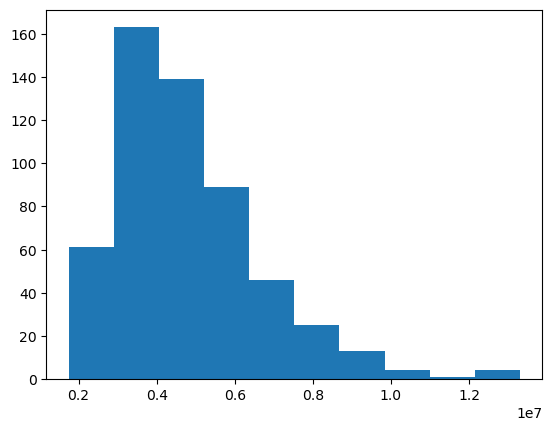

In [7]:
plt.hist(df['price'])

(array([ 73., 198., 117.,  88.,  39.,  15.,   8.,   5.,   0.,   2.]),
 array([ 1650.,  3105.,  4560.,  6015.,  7470.,  8925., 10380., 11835.,
        13290., 14745., 16200.]),
 <BarContainer object of 10 artists>)

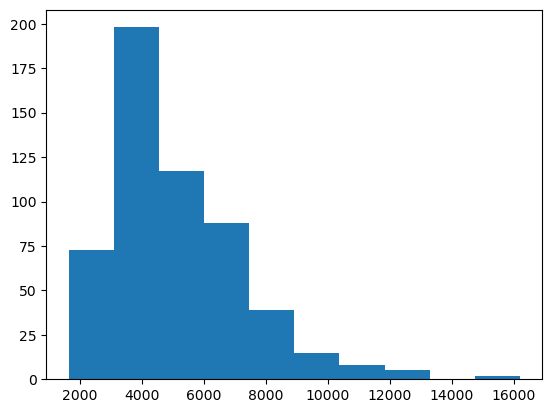

In [8]:
plt.hist(df['area'])

<Axes: xlabel='price', ylabel='area'>

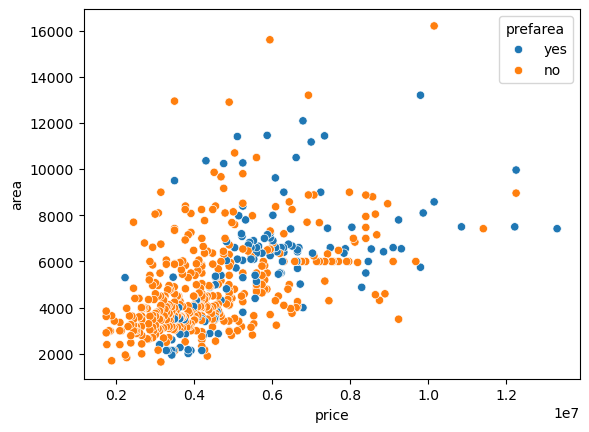

In [9]:
sns.scatterplot(data=df,x='price',y='area',hue='prefarea')

In [10]:
X = df[["area"]].values
y = df["price"].values

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"MSE (Linear Regression): {mse}")

MSE (Linear Regression): 2488861398180.657


In [13]:
X.shape,y.shape

((545, 1), (545,))

In [14]:
x=np.array(df['area'].values)
x.shape

(545,)

In [15]:
y=np.array(y)

In [16]:
def gradient_descent(x,y,lr,itr):
    (m,c)=(0,0)
    n=len(x)
    for j in range(itr):
        total_error=0
        for k in range(n):
            total_error+=(y[k]-(m*x[k]+c))**2
        total_error=total_error/n
        print(f'for learning rate {lr} iteration{j} error = {total_error}')
        m1,c1=0,0
        for p in range(n):
            m1=m1+((-1)*p*(y[p] - m*x[p] - c))
            c1=c1+((-1)*(y[p] - m*x[p] -c))
        m1=m1*(2/n)
        c1=c1*(2/n)
        m1=m-lr*m1
        c1=c-lr*c1
        print(f'm = {m1} c= {c1}')
        m=m1
        c=c1
        plt.plot(x,(m*x + c))
        plt.scatter(j,total_error)    

In [60]:
# Independent and dependent variables
X = df['area'].values.reshape(-1, 1)
y = df['price'].values

# Normalize the dataset
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std
y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std

# Add a bias term to X (for linear regression intercept)
X_bias = np.c_[np.ones(X_norm.shape[0]), X_norm]

# Initialize parameters for gradient descent
theta = np.zeros(2)
learning_rate = 0.01
iterations = 1000
m=len(y_norm)

In [64]:
# Function to compute Mean Squared Error (MSE)
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Gradient descent algorithm
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta,cost_history

In [68]:
# Train the model using gradient descent
theta_optimal, cost_history = gradient_descent(X_bias,y_norm,theta,learning_rate,iterations)

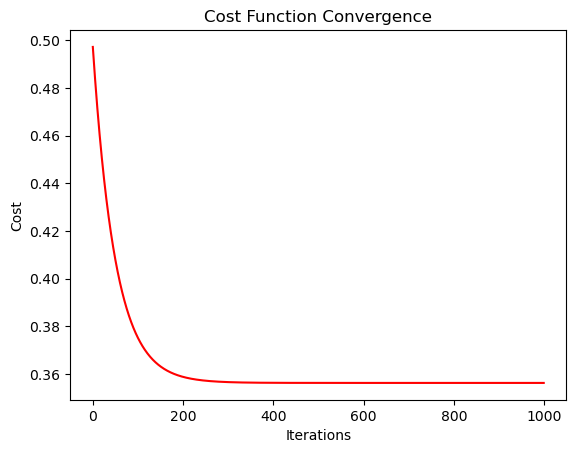

In [70]:
# Plot the cost function over iterations
plt.plot(range(iterations), cost_history, color='red')
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [76]:
# Predict using the trained model
predictions = X_bias.dot(theta_optimal)
predictions_original_scale = predictions*y_std+y_mean

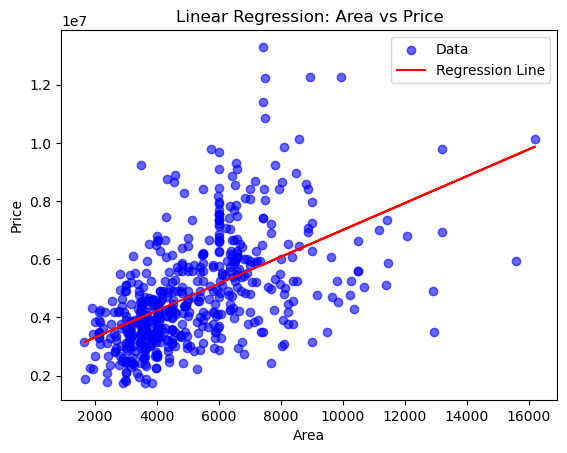

In [78]:
# Plot the regression line
plt.scatter(df['area'], df['price'], color='blue', alpha=0.6, label='Data')
plt.plot(df['area'], predictions_original_scale, color='red', label='Regression Line')
plt.title('Linear Regression: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

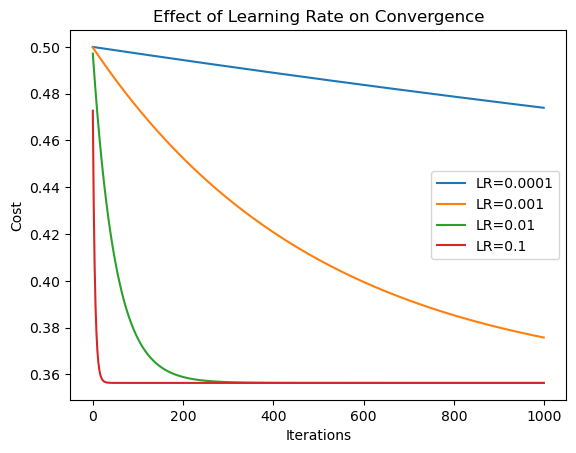

In [80]:
# Experiment with different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
for lr in learning_rates:
    _, cost_history_lr = gradient_descent(X_bias, y_norm, np.zeros(2), lr, iterations)
    plt.plot(range(iterations), cost_history_lr, label=f'LR={lr}')

plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()